In [74]:
# Dependencies
import json
import pandas as pd
import numpy as np
import csv
import openweathermapy.core as ow
from citipy import citipy as cp
import matplotlib.pyplot as plt
import requests as req
from random import *

In [73]:


#Checking cities used by citipy. Code not used anywhere else
cities_pd = pd.read_csv("worldcitiespop.csv",  encoding = "iso-8859-1")
#iso-8859-1
#utf-8
#utf-16
#windows-1252
selected_cities = cities_pd.sample(n=500)
selected_cities['Latitude'].max()

#testing citipy
#city = cp.nearest_city(22.99, 120.21)
city = cp.nearest_city(0,0)
city.city_name

/Users/aparna/anaconda3/envs/PythonData1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


'takoradi'

In [75]:
# testing api calls
# Save openweathermap config information
#api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
api_key="9e91d17016bf11a7b628bca0139992e9"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + api_key + "&units=imperial"+"&q=takoradi"
print (query_url)
# Get weather data
weather_response = req.get(query_url)
weather_json = weather_response.json()

#print(json.dumps(weather_json, indent=4, sort_keys=True))

http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=takoradi


In [61]:
selected_cities=pd.DataFrame()
selected_cities

""


In [62]:
selected_cities["Lat"]=""
selected_cities["Lng"]=""
selected_cities["city"]=""
selected_cities["Temperature"]=""
selected_cities["Humidity"]=""
selected_cities["Cloudiness"]=""
selected_cities["WindSpeed"]=""
selected_cities

for i in range(500):
    lat= randint(-30, 70)
    lng=lat*uniform(-1.5, 1.5)
    print("lat :" + str(lat))
    print("lng :" + str(lng))
    selected_cities.set_value(i, "Lat",lat)
    selected_cities.set_value(i, "Lng",lng)
    city = cp.nearest_city(lat,lng).city_name
    print ("city is :" + city)
    selected_cities.set_value(i, "City",city)
    # Build query URL
    query_url = url + "appid=" + api_key + "&units=imperial"+ "&q=" + city
    print("city # : " + str(i) + " city name: "+ city + " URL: " + query_url)
    # Get weather data
    weather_response = req.get(query_url)
    weather_json = weather_response.json()
    #print(json.dumps(weather_json, indent=4, sort_keys=True))
    try:
        selected_cities.set_value(i, "Temperature", weather_json["main"]["temp"])
        selected_cities.set_value(i, "Humidity", weather_json["main"]["humidity"])
        selected_cities.set_value(i, "Cloudiness", weather_json["clouds"]["all"])
        selected_cities.set_value(i, "WindSpeed", weather_json["wind"]["speed"])  
    except:
        print("Error with city data. Skipping record #" + str(i))
        print("Error message:" + weather_json['message'])
        continue
    
selected_cities.head()

lat :43
lng :4.713073995096643
city is :port-de-bouc
city # : 0 city name: port-de-bouc URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=port-de-bouc
lat :22
lng :-17.869062366788178
city is :nouadhibou
city # : 1 city name: nouadhibou URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=nouadhibou
lat :10
lng :3.8670047034435973
city is :nikki
city # : 2 city name: nikki URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=nikki
lat :38
lng :9.69218862644943
city is :manzil jamil
city # : 3 city name: manzil jamil URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=manzil jamil
Error with city data. Skipping record #3
Error message:city not found
lat :8
lng :-3.7393651074034224
city is :tanda
city # : 4 city name: tanda URL: http://api.openweathermap.org/data/2.5/

lat :40
lng :-22.327225475420388
city is :vila franca do campo
city # : 40 city name: vila franca do campo URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=vila franca do campo
lat :14
lng :-20.041906913086855
city is :dakar
city # : 41 city name: dakar URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=dakar
lat :52
lng :3.628628832992592
city is :goedereede
city # : 42 city name: goedereede URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=goedereede
lat :11
lng :-11.366943064702392
city is :dabola
city # : 43 city name: dabola URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=dabola
lat :-14
lng :-7.226279286058103
city is :jamestown
city # : 44 city name: jamestown URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9

lat :50
lng :13.368913591145382
city is :plasy
city # : 82 city name: plasy URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=plasy
lat :2
lng :2.2783774661044713
city is :anloga
city # : 83 city name: anloga URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=anloga
lat :-18
lng :4.102831235297432
city is :namibe
city # : 84 city name: namibe URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=namibe
lat :62
lng :78.05553262263989
city is :strezhevoy
city # : 85 city name: strezhevoy URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=strezhevoy
lat :-21
lng :-14.83586553240842
city is :jamestown
city # : 86 city name: jamestown URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=jamestown
lat :-2
lng :-0.51

lat :21
lng :-6.613432840405362
city is :taoudenni
city # : 123 city name: taoudenni URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=taoudenni
lat :-15
lng :14.969492709608597
city is :caluquembe
city # : 124 city name: caluquembe URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=caluquembe
lat :-28
lng :-36.304731115701586
city is :arraial do cabo
city # : 125 city name: arraial do cabo URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=arraial do cabo
lat :29
lng :8.832090547927923
city is :nalut
city # : 126 city name: nalut URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=nalut
lat :45
lng :14.460181936531667
city is :krk
city # : 127 city name: krk URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperia

lat :-7
lng :4.339773713035758
city is :gamba
city # : 165 city name: gamba URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=gamba
lat :29
lng :11.785167797175983
city is :awbari
city # : 166 city name: awbari URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=awbari
lat :-17
lng :-18.016533978735985
city is :georgetown
city # : 167 city name: georgetown URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=georgetown
lat :59
lng :12.153259286707163
city is :vanersborg
city # : 168 city name: vanersborg URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=vanersborg
lat :-15
lng :15.24582371939833
city is :caconda
city # : 169 city name: caconda URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=caconda
lat :

lat :-3
lng :3.3223413477262467
city is :port-gentil
city # : 206 city name: port-gentil URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=port-gentil
lat :-29
lng :34.80326315924071
city is :richards bay
city # : 207 city name: richards bay URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=richards bay
lat :65
lng :31.893522010593777
city is :kalevala
city # : 208 city name: kalevala URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=kalevala
lat :20
lng :22.50933604943878
city is :faya
city # : 209 city name: faya URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=faya
Error with city data. Skipping record #209
Error message:city not found
lat :20
lng :-16.33100729994818
city is :nouadhibou
city # : 210 city name: nouadhibou URL: http://api.openweathermap.or

Error with city data. Skipping record #247
Error message:city not found
lat :-21
lng :-24.158004708675087
city is :caravelas
city # : 248 city name: caravelas URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=caravelas
lat :65
lng :-5.696371300148446
city is :klaksvik
city # : 249 city name: klaksvik URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=klaksvik
lat :5
lng :-3.800137724199033
city is :bonoua
city # : 250 city name: bonoua URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=bonoua
lat :16
lng :15.803625626171439
city is :mao
city # : 251 city name: mao URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=mao
lat :-7
lng :-9.39250985402666
city is :georgetown
city # : 252 city name: georgetown URL: http://api.openweathermap.org/data/2.5/weather?appid=9

lat :28
lng :33.633297853674684
city is :hurghada
city # : 290 city name: hurghada URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=hurghada
Error with city data. Skipping record #290
Error message:city not found
lat :-3
lng :0.43720813870804
city is :takoradi
city # : 291 city name: takoradi URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=takoradi
lat :19
lng :19.65656173883356
city is :faya
city # : 292 city name: faya URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=faya
Error with city data. Skipping record #292
Error message:city not found
lat :12
lng :7.2348106076642935
city is :malumfashi
city # : 293 city name: malumfashi URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=malumfashi
lat :-12
lng :3.8396202916787434
city is :namibe
city # : 294 cit

lat :-17
lng :16.78120438977521
city is :eenhana
city # : 328 city name: eenhana URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=eenhana
lat :25
lng :12.73125377531381
city is :marzuq
city # : 329 city name: marzuq URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=marzuq
Error with city data. Skipping record #329
Error message:city not found
lat :-5
lng :5.237235188740596
city is :omboue
city # : 330 city name: omboue URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=omboue
lat :50
lng :-23.971199697577795
city is :lagoa
city # : 331 city name: lagoa URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=lagoa
lat :-4
lng :0.5318062549292666
city is :port-gentil
city # : 332 city name: port-gentil URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d1

lng :-0.8233609511788575
city is :takoradi
city # : 368 city name: takoradi URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=takoradi
lat :-10
lng :6.622090034967235
city is :luanda
city # : 369 city name: luanda URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=luanda
lat :28
lng :11.537974533088963
city is :awbari
city # : 370 city name: awbari URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=awbari
lat :22
lng :4.398724220533342
city is :tessalit
city # : 371 city name: tessalit URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=tessalit
lat :-11
lng :7.0761711289749165
city is :benguela
city # : 372 city name: benguela URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=benguela
lat :51
lng :-17.85

lat :-26
lng :1.6159602351385134
city is :jamestown
city # : 408 city name: jamestown URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=jamestown
lat :19
lng :-15.278537858222942
city is :nouakchott
city # : 409 city name: nouakchott URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=nouakchott
lat :-25
lng :27.247374077870955
city is :mogwase
city # : 410 city name: mogwase URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=mogwase
lat :8
lng :-1.7673788253083824
city is :kintampo
city # : 411 city name: kintampo URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=kintampo
lat :-20
lng :-11.114055624531662
city is :jamestown
city # : 412 city name: jamestown URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperia

lat :-9
lng :-9.008586483110692
city is :georgetown
city # : 449 city name: georgetown URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=georgetown
lat :58
lng :85.86124218927165
city is :belyy yar
city # : 450 city name: belyy yar URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=belyy yar
lat :55
lng :-27.196927239584152
city is :grindavik
city # : 451 city name: grindavik URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=grindavik
lat :64
lng :-69.51543400141409
city is :iqaluit
city # : 452 city name: iqaluit URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=iqaluit
lat :-5
lng :-0.609086768935887
city is :takoradi
city # : 453 city name: takoradi URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=

lat :50
lng :10.507841893746894
city is :schweinfurt
city # : 488 city name: schweinfurt URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=schweinfurt
lat :15
lng :-9.796641871334261
city is :nioro
city # : 489 city name: nioro URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=nioro
lat :3
lng :-0.0747049809545679
city is :mumford
city # : 490 city name: mumford URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=mumford
lat :32
lng :-31.206033037055782
city is :ribeira grande
city # : 491 city name: ribeira grande URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=imperial&q=ribeira grande
lat :12
lng :-16.10852182848545
city is :canchungo
city # : 492 city name: canchungo URL: http://api.openweathermap.org/data/2.5/weather?appid=9e91d17016bf11a7b628bca0139992e9&units=im

,Lat,Lng,city,Temperature,Humidity,Cloudiness,WindSpeed,City
0,43,4.71307,NaN,39.16,60,0,6.93,port-de-bouc
1,22,-17.8691,NaN,66.2,72,80,18.34,nouadhibou
2,10,3.867,NaN,65.57,61,0,2.71,nikki
3,38,9.69219,NaN,NaN,NaN,NaN,NaN,manzil jamil
4,8,-3.73937,NaN,48.29,90,8,3.83,tanda


In [63]:
# Create dataframe only with weather data
selected_cities_withdata= selected_cities[selected_cities['Temperature']!=""]
len(selected_cities_withdata)

500

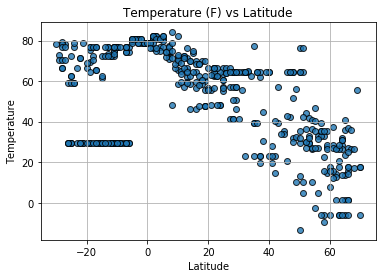

In [65]:
# Build a scatter plot for Temperateure vs Latitude
plt.scatter(selected_cities_withdata["Lat"], 
            selected_cities_withdata["Temperature"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="TemperatureLabel")

# Incorporate the other graph properties
plt.title("Temperature (F) vs Latitude")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)
#plt.xlim([-2.5, 202])
#plt.ylim([-2.5, 110000])

# Save the figure
plt.savefig("TempByLat.png")

# Show plot
plt.show()

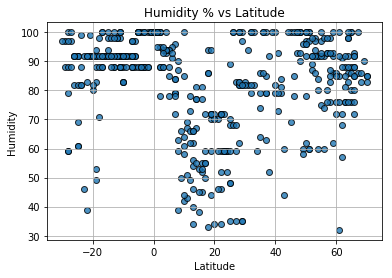

In [66]:
# Build a scatter plot for Humidity vs Latitude
plt.scatter(selected_cities_withdata["Lat"], 
            selected_cities_withdata["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="HumidityLabel")

# Incorporate the other graph properties
plt.title("Humidity % vs Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
#plt.xlim([-2.5, 202])
#plt.ylim([-2.5, 110000])

# Save the figure
plt.savefig("HumidityByLat.png")

# Show plot
plt.show()

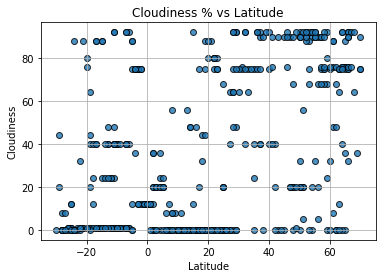

In [69]:
# Build a scatter plot for Clodiness vs Latitude
plt.scatter(selected_cities_withdata["Lat"], 
            selected_cities_withdata["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CoudinessLabel")

# Incorporate the other graph properties
plt.title("Cloudiness % vs Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
#plt.xlim([-2.5, 202])
#plt.ylim([-2.5, 110000])

# Save the figure
plt.savefig("CloudinessByLat.png")

# Show plot
plt.show()

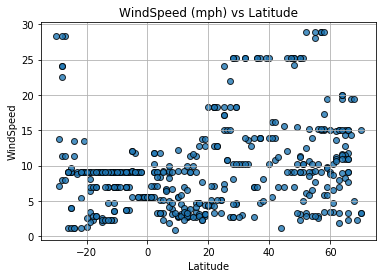

In [70]:
# Build a scatter plot for WindSpeed vs Latitude
plt.scatter(selected_cities_withdata["Lat"], 
            selected_cities_withdata["WindSpeed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="WindSpeedLabel")

# Incorporate the other graph properties
plt.title("WindSpeed (mph) vs Latitude")
plt.ylabel("WindSpeed")
plt.xlabel("Latitude")
plt.grid(True)
#plt.xlim([-2.5, 202])
#plt.ylim([-2.5, 110000])

# Save the figure
plt.savefig("WindSpeedByLat.png")

# Show plot
plt.show()